# Sampling from symmetric Dirichlet distribution priors

## Symmetric Dirichlet distributions

One compelling criterion for a prior over categorical PMFs that aims to be uninformative or noncommital about the categorical PMF is that the prior not express any preference for some categories over others.  This requires that the prior be **symmetric** with respect to the $\alpha_k$ category probability parameters.

In Lec06 we discussed the Dirichlet distribution, a PDF for the $\alpha_k$ parameters describing a $K$-category categorical PMF (a "PDF over PMFs").  It has $K$ concentration parameters, $\kappa_k$. The Dirichlet PDF is given by
$$
p(\alpha_1,\ldots,\alpha_K) =
  \frac{\Gamma(\kappa_0)}{\Gamma(\kappa_1)\cdots\Gamma(\kappa_K)}\;
  \alpha_1^{\kappa_1-1}\cdots\alpha_K^{\kappa_K-1}\;
  \delta\left(1-\sum_k\alpha_k\right),
$$
where $\kappa_0 = \sum_{k=1}^K \kappa_k$. 

A *symmetric* Dirichlet distribution is a Dirichlet distribution with all concentration parameters equal to each other: $\kappa_i = \kappa$:
$$
p(\alpha_1,\ldots,\alpha_K) =
  \frac{\Gamma(K\cdot\kappa)}{[\Gamma(\kappa)]^K}\;
  \alpha_1^{\kappa-1}\cdots\alpha_K^{\kappa-1}\;
  \delta\left(1-\sum_k\alpha_k\right),
$$
If $\kappa = 1$, the resulting symmetric Dirichlet PDF is constant—the prior used in Lec06. Here we'll explore this prior, and an alternative.

In [1]:
from matplotlib.pyplot import *
from scipy import *
from scipy.stats import dirichlet

from shelves import shelves

# pyplot.ion() tells Jupyter to make plots in cells, or tells IPython
# to make plots in an interactive window.
ion()

In [2]:
class SymmetricDirichlet:
    
    def __init__(self, ncat, kappa):
        """
        Define a symmetric Dirichlet distribution over PMFs with `ncat` categories,
        with each category's concentration parameter equal to `kappa`.
        """
        self.ncat = ncat
        self.kappa = kappa
        self.kappa0 = ncat*kappa
        self.kappas = kappa*ones(ncat)
        
        # Define the Dirichlet by setting all kappas = kappa.
        self.distn = dirichlet(self.kappas)

    def pdf(self, alphas):
        """
        Compute the PDF for category probabilities given by `alphas`.
        """
        return self.distn.pdf(alphas)

    def sample(self, n=1):
        """
        Return `n` samples from a symmetric Dirichlet.
        """
        return self.distn.rvs(n)

### Uniform symmetric Dirichlet priors

Intuition suggests that a uniform prior should be uniformative/noncommital. A main point of this exercise is to make you question that intuition!  Uniform priors are typically reasonable starting points for an individual parameter, or maybe a few parameters considered jointly. But in high-dimensional spaces, uniform priors can have suprising properties!

Let's look at the uniform symmetric Dirichlet prior over 2 categories (i.e., a Beta distribution):

In [3]:
flatsd2 = SymmetricDirichlet(2, 1.)

Print out 10 2-category PMFs drawn from this prior. Note each probability ($\alpha_1$, $\alpha_2$) varies pretty much over the full range $[0,1]$.

In [4]:
samps = flatsd2.sample(10)
samps

array([[0.05953952, 0.94046048],
       [0.66906725, 0.33093275],
       [0.52707986, 0.47292014],
       [0.73665587, 0.26334413],
       [0.63650447, 0.36349553],
       [0.33367531, 0.66632469],
       [0.89756005, 0.10243995],
       [0.89279527, 0.10720473],
       [0.08220692, 0.91779308],
       [0.18094898, 0.81905102]])

Let's show those PMFs in a plot. This uses a function in the `shelves.py` module imported above. This `stack_samples` function stacks the PMFs. Note that the ordinate for each one spans [0,`delta`], where here we set `delta=1.2` so the plots span the full possible range for any $\alpha_k$, with a little extra space to clearly separate the cases in the stack.

In [5]:
def stack_samples(samples, delta=1.2):
    """
    Make a stack of plots of the PMFs in `samples`, each one offset
    vertically by `delta`.
    """
    figure(figsize=(10,7))
    dy = 0.  # starting vertical shift
    for samp in samples:
        ax = shelves(samp, dy=dy)  # imported from shelves.py
        ax.axhline(dy, c='k')  # horizontal line separating each case
        dy += delta

    # Don't show y ticks, since the dy vertical shift changes the y values.
    ax.set_yticks([])

    xlim(0., 1.)  # keep mpl from padding the left or right (dangling shelves!)
    ylim(0., len(samples)*delta)  # keep mpl from padding the bottom or top

    # It's often a good idea to return axes when you make a plot in a function.
    # You can ignore the return value, or capture it in cases when you might
    # want to modify the plot later.
    return ax

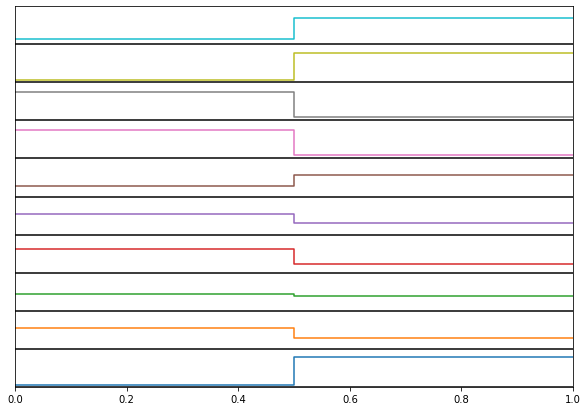

In [6]:
stack_samples(samps)

Now do the same exercise for $K=5$ and $K=20$. It may also be instructive to look at the samples in `samps`, although this becomes unwieldy for large $K$.